<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/DaironMontes/ParcialFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Dairon Alberto Montes Barrada

> 1001686081

Puntos 1 a 3: https://drive.google.com/file/d/1fVwO6gOHRrdE4TXOpX_5XKeKd38iNnmV/view?usp=sharing

a. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab

x(t) = 4 ∗ cos(80πt + (π /4)) + k∗sen(40πt) + 5

Con k = 2 (a+1)

Con a = 1 (último número de la cédula)

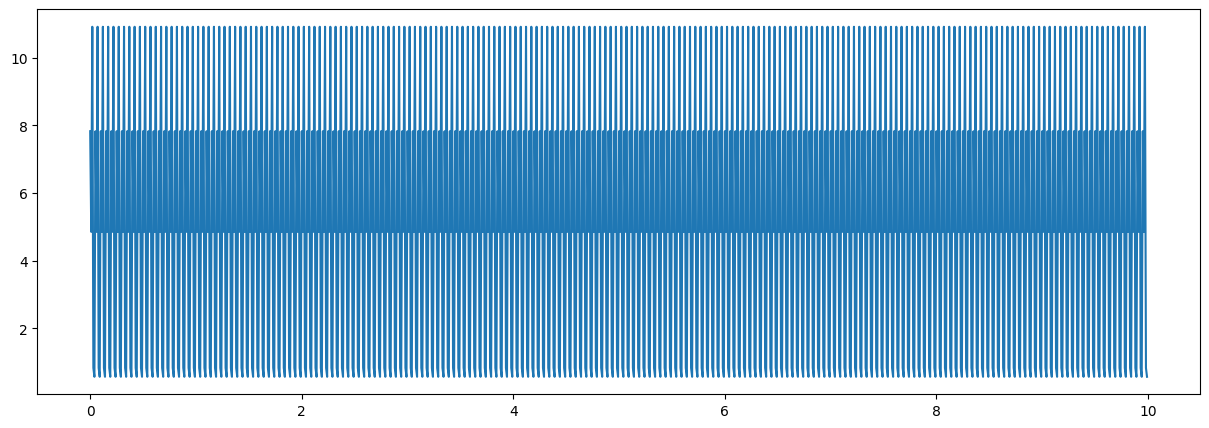

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 # Por teorema de Nyquist, esta debe ser al menos 2 veces la frecuencia mayor

t = np.arange(0, 10, 1/fs)

k = 2 * (1 + 1)

x_0 = 4 * np.cos((80 * np.pi * t) + (np.pi/4)) # Frecuencia mayor presente en (80π / 2π) = 40 Hz

x_1 = k * np.sin(40 * np.pi * t)

x_2 = 5

x = x_0 + x_1 + x_2

plt.figure(figsize=(15, 5))
plt.plot(t, x)

b. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función
que:

> A) Reciba la señal **x** y haga la partición de la misma usando **M** muestras por segmento y **S** muestras de solapamiento.

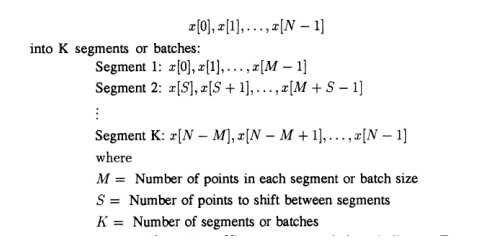

> B) Por cada segmento, multiplicar por ventana **w[n]** y calcular la transformada discreta de Fourier del segmento enventanado

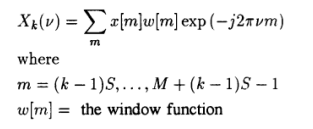

> C) De la transformada de cada segmento obtener el periodograma modificado.

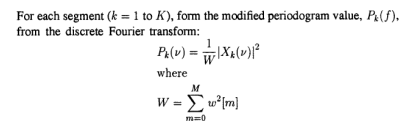

> D) Promediar los periodogramas modificados.

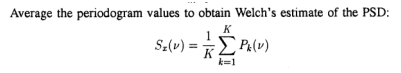

In [30]:
import numpy as np

def PeriodogramaDeWelch(x, M, S, ventana='Hamming'):
  N = len(x)
  K = (N - S) // (M - S)

  if ventana == 'Hamming':
    ventana = np.hamming(M)
  else:
    raise ValueError("Tipo de ventana no reconocido.")

  # Inicializar el espectro de potencia
  psd = np.zeros(M // 2 + 1)

  # División en segmentos y cálculo del periodograma
  for k in range(K):
    inicio = k * (M - S)  # Inicio del segmento
    final = inicio + M      # Final del segmento
    segmento = x[inicio:final]

    # Aplicar ventana
    segmento = segmento * ventana

    # Transformada de Fourier
    fft_segment = np.fft.rfft(segmento)

    # Periodograma modificado
    W = np.sum(ventana ** 2)
    P_k = (1 / W) * np.abs(fft_segment) ** 2

    # Acumular
    psd += P_k

    # Promediar
    psd /= K

    return psd


Validar el funcionamiento de la rutina así:

Mostrar el funcionamiento de la rutina usando la señal usada del punto 4, M = 40, S = 30, ventana
Hamming

[7.42675601e+00 1.44066902e+00 4.26310648e-04 5.21796303e-05
 1.17485027e-05 6.92152601e-06 5.67803455e-05 2.31094719e-01
 1.18734359e+00 2.30793089e-01 6.62525926e-05 9.45743350e-06
 5.08328652e-06 1.07036882e-05 7.13586419e-05 2.30421307e-01
 1.18833961e+00 2.30548405e-01 6.66564079e-05 7.88937757e-06
 2.94295667e-06]


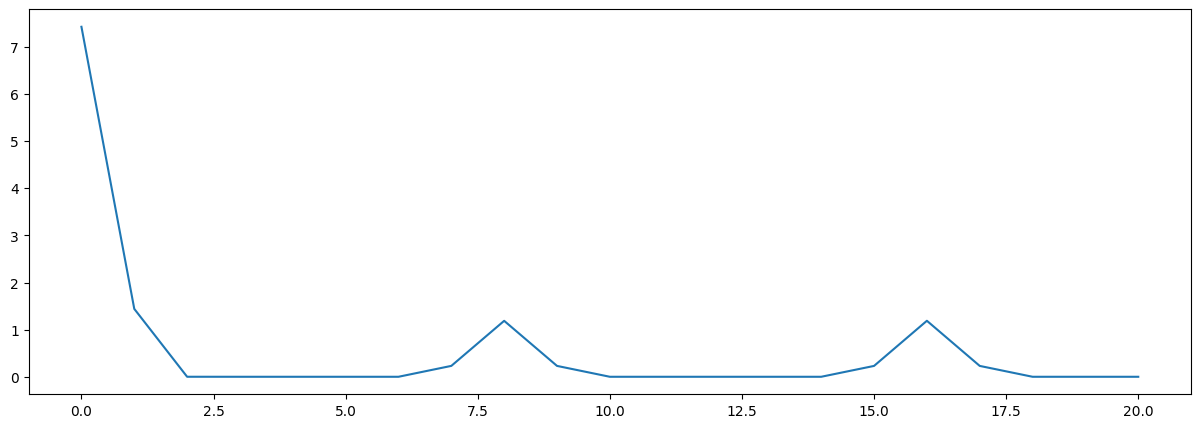

In [33]:
print(PeriodogramaDeWelch(x, M=40, S=30, ventana='Hamming'))

plt.figure(figsize=(15, 5))
plt.plot(PeriodogramaDeWelch(x, M=40, S=30, ventana='Hamming'))

c. Una señal fisiológica definida en el rango entre **a** Hz y **b** Hz se toma con frecuencia de muestreo
de 100 Hz. Para esta señal:

> • Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada

> • Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada


 a = 5 y b = 50

### Filtro pasa-altas

dB = 20 * log10 (1/10)

dB = −20dB

*Ventana rectangular*

N = 18

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Parámetros del filtro
fs = 100  # Frecuencia de muestreo
fcorte = 5  # Frecuencia de corte

N = 18 # Orden del filtro

# Diseño del filtro FIR pasa-altas con firwin
pasaltas = firwin(N, fcorte, fs=fs, pass_zero='highpass')

### Filtro pasa-bajas

dB = 20 * log10 (1/100)

dB = −40dB